# Project: Investigate "No-Show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Questions to be investigated:
### 1. Did scholarship affected the no show rate?
### 2. Did hypertension affected the no show rate?
### 3. Did diabetes affected the no show rate?
### 4. Did alcoholism affected the no show rate?
### 5. Did handicap affected the no show rate?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Check for duplicates

In [6]:
df.duplicated().any()

False

### Check for null values

In [7]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

### Check for unique values

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning



### 1. Changing columns names to lower case
### 2. Rename columns' headers to be more understandable and convenient
### 3. Change scheduled and appointment days to datetime data type
### 4. Change no_show column to 1 and 0
### 5. As mentioned in the describe function, age had incorrect data which is less than or equals to 0. These had to be replaced by the mean of the age.
### 6. Looping over all integer columns that are to be investigated to check they only contain 1 and 0


In [9]:
df.drop(['AppointmentID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


### Changing columns' names to be lower case

In [10]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   gender          110527 non-null  object 
 2   scheduledday    110527 non-null  object 
 3   appointmentday  110527 non-null  object 
 4   age             110527 non-null  int64  
 5   neighbourhood   110527 non-null  object 
 6   scholarship     110527 non-null  int64  
 7   hipertension    110527 non-null  int64  
 8   diabetes        110527 non-null  int64  
 9   alcoholism      110527 non-null  int64  
 10  handcap         110527 non-null  int64  
 11  sms_received    110527 non-null  int64  
 12  no-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


### Rename columns' headers to be more understandable and convenient

In [11]:
df.rename(columns = {'patientid': 'patient_id','scheduledday': 'scheduled_day','appointmentday': 'appointment_day',
                     'hipertension': 'hypertension','handcap': 'handicap','no-show':'no_show'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   gender           110527 non-null  object 
 2   scheduled_day    110527 non-null  object 
 3   appointment_day  110527 non-null  object 
 4   age              110527 non-null  int64  
 5   neighbourhood    110527 non-null  object 
 6   scholarship      110527 non-null  int64  
 7   hypertension     110527 non-null  int64  
 8   diabetes         110527 non-null  int64  
 9   alcoholism       110527 non-null  int64  
 10  handicap         110527 non-null  int64  
 11  sms_received     110527 non-null  int64  
 12  no_show          110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


### Change scheduled and appointment days to datetime data type

In [12]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   gender           110527 non-null  object             
 2   scheduled_day    110527 non-null  datetime64[ns, UTC]
 3   appointment_day  110527 non-null  datetime64[ns, UTC]
 4   age              110527 non-null  int64              
 5   neighbourhood    110527 non-null  object             
 6   scholarship      110527 non-null  int64              
 7   hypertension     110527 non-null  int64              
 8   diabetes         110527 non-null  int64              
 9   alcoholism       110527 non-null  int64              
 10  handicap         110527 non-null  int64              
 11  sms_received     110527 non-null  int64              
 12  no_show          110527 non-null  object             
dtyp

### Change no_show column to 1 and 0

In [13]:
df.no_show = np.where(df.no_show == "Yes", 1, 0)
df['no_show'] = pd.to_numeric(df['no_show'])
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### As mentioned in the describe function, age had incorrect data which is less than or equals to 0. These had to be replaced by the mean of the age.

In [14]:
incorrect_age = df.query('age <= 0')
incorrect_age

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,0
63,2.366233e+14,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,0
64,1.885174e+14,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,0
65,2.718818e+14,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,0
67,8.647128e+13,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,0
110346,5.577525e+12,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,0
110454,6.142460e+11,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,0
110460,4.321846e+13,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,0


In [15]:
age_mean = df['age'].mean()
df.replace({'age': {0: age_mean}}, inplace=True)
df.replace({'age': {-1: age_mean}}, inplace=True)

In [16]:
df.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Looping over all integer columns to check they only contain 1 and 0

In [17]:
df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

In [18]:
df.hypertension.value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

In [19]:
df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [20]:
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [21]:
df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

### After finding out that handicap column has different types it was replaced by 1 and 0 only where 1 is any type of handicap

In [22]:
df['handicap'] = np.where(df['handicap'] > 1, 1, df['handicap'])
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

In [23]:
df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [24]:
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

### Creating a mask from no_show column for 2 new columns where they differentiate between when showed and when did not show. This might be useful for analysis later on.

In [25]:
showed_up = df['no_show'] == 0
no_showing = df['no_show'] == 1
df['showed_up'] = showed_up
df['no_showing'] = no_showing

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Analysing the show vs no show against all given features to try and spot a pattern!)

### Show vs no show pie chart that showed that almost 80% showed up to their medical appointment

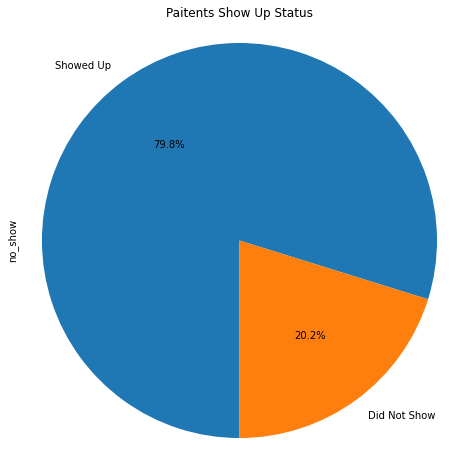

In [59]:
ind = df['no_show'].value_counts().index
df['no_show'].value_counts()[ind].plot(kind='pie', labels = ['Showed Up', 'Did Not Show'], figsize=(8,8), startangle = 270,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Up Status');

### Age Histogram to understand the age distribution that showed most registered patients are around 40 years old.

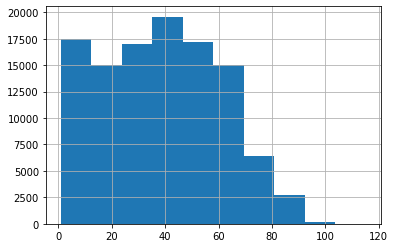

In [28]:
df['age'].hist();

### Gender bar chart to understand the gender distribution that showed that most registered patients were Females.

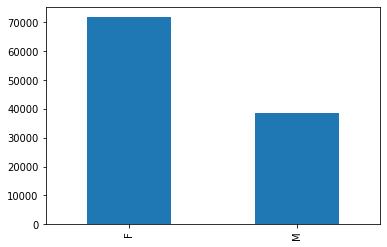

In [62]:
ind2 = df['gender'].value_counts().index
df['gender'].value_counts()[ind].plot(kind='bar');

### Patients who did not show up are more females than males.

Text(0, 0.5, 'Number of Patients')

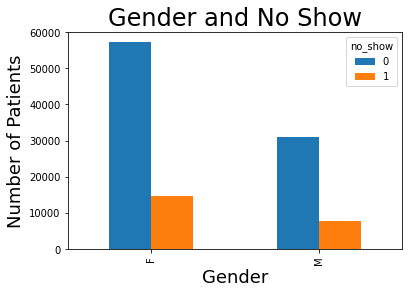

In [30]:
groups = df.groupby(['gender','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Gender and No Show', fontsize = 24)
plt.xticks([0, 1], ['F', 'M'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Patients who did not show up are more without scholarships than those with scholarships.

Text(0, 0.5, 'Number of Patients')

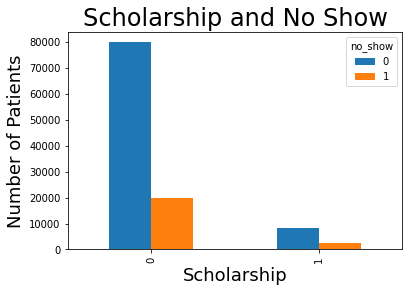

In [31]:
groups = df.groupby(['scholarship','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Scholarship and No Show', fontsize = 24)
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Patients who did not show up are more without hypertension that those with hypertension.

Text(0, 0.5, 'Number of Patients')

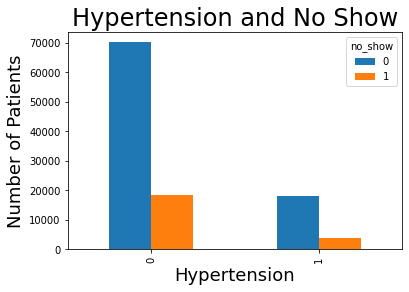

In [32]:
groups = df.groupby(['hypertension','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Hypertension and No Show', fontsize = 24)
plt.xlabel('Hypertension', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Patients who did not show up are more without diabetes that those with diabetes.

Text(0, 0.5, 'Number of Patients')

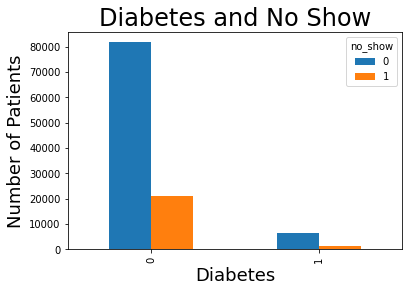

In [33]:
groups = df.groupby(['diabetes','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Diabetes and No Show', fontsize = 24)
plt.xlabel('Diabetes', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Patients who did not show up are more who are sober than others.

Text(0, 0.5, 'Number of Patients')

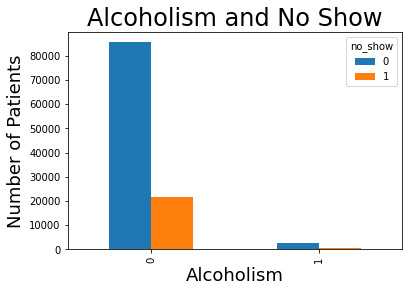

In [34]:
groups = df.groupby(['alcoholism','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Alcoholism and No Show', fontsize = 24)
plt.xlabel('Alcoholism', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Patients who did not show up are more handicapped that those who are not.

Text(0, 0.5, 'Number of Patients')

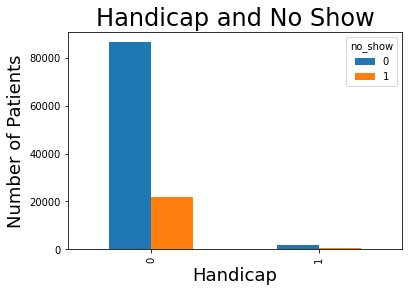

In [35]:
groups = df.groupby(['handicap','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Handicap and No Show', fontsize = 24)
plt.xlabel('Handicap', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Research Question 2  (Creating 2 new columns and further analysing them!)

### Changing appointment and scheduled days one more time to date only data type

In [38]:
df['appointment_day'] = pd.to_datetime(pd.to_datetime(df['appointment_day']).dt.date)
df['scheduled_day'] = pd.to_datetime(pd.to_datetime(df['scheduled_day']).dt.date)

### Creating a new column that calculates the days in between appointments and scheduled days.

In [39]:
days_in_between = (df['appointment_day'] - df['scheduled_day']).dt.days
df.insert(4, 'days_in_between', days_in_between)
df.head()

,patient_id,gender,scheduled_day,appointment_day,days_in_between,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing
0,2.987250e+13,F,2016-04-29,2016-04-29,0,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,M,2016-04-29,2016-04-29,0,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,F,2016-04-29,2016-04-29,0,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,F,2016-04-29,2016-04-29,0,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,F,2016-04-29,2016-04-29,0,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


### Checking if there is wrong data where the appointment day comes before the scheduled day.

In [40]:
incorrect_days_in_between = df.query('days_in_between < 0')
incorrect_days_in_between

,patient_id,gender,scheduled_day,appointment_day,days_in_between,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing
27033,7.839273e+12,M,2016-05-10,2016-05-09,-1,38.0,RESISTÊNCIA,0,0,0,0,1,0,1,False,True
55226,7.896294e+12,F,2016-05-18,2016-05-17,-1,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,1,False,True
64175,2.425226e+13,F,2016-05-05,2016-05-04,-1,22.0,CONSOLAÇÃO,0,0,0,0,0,0,1,False,True
71533,9.982316e+14,F,2016-05-11,2016-05-05,-6,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,1,False,True
72362,3.787482e+12,M,2016-05-04,2016-05-03,-1,7.0,TABUAZEIRO,0,0,0,0,0,0,1,False,True


### Removing these records and checking data afterwards.

In [41]:
df = df[df['days_in_between'] >= 0]  

In [42]:
df.describe()

,patient_id,days_in_between,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,10.184253,38.277000,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,0.201896
std,2.560866e+14,15.255115,22.104357,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,0.401417
min,3.921784e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,4.000000,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439277e+13,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
incorrect_days_in_between = df.query('days_in_between < 0')
incorrect_days_in_between

,patient_id,gender,scheduled_day,appointment_day,days_in_between,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing


In [44]:
df.describe()

,patient_id,days_in_between,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,10.184253,38.277000,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,0.201896
std,2.560866e+14,15.255115,22.104357,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,0.401417
min,3.921784e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,4.000000,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439277e+13,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,days_in_between,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing
0,2.987250e+13,F,2016-04-29,2016-04-29,0,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,M,2016-04-29,2016-04-29,0,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,F,2016-04-29,2016-04-29,0,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,F,2016-04-29,2016-04-29,0,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,F,2016-04-29,2016-04-29,0,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


### Preparing data for a bar chart.

In [47]:
edges_bin = [-1, 0, 2, 5, 10, 15, 179]
names_bin = ['0 days', '1-2 days','3-5 days','6-10 days', '11-15','16 days and above']
waiting = pd.cut(df['days_in_between'], edges_bin, labels=names_bin)
df.insert(5, 'waiting', waiting)
df.head()

,patient_id,gender,scheduled_day,appointment_day,days_in_between,waiting,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing
0,2.987250e+13,F,2016-04-29,2016-04-29,0,0 days,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,M,2016-04-29,2016-04-29,0,0 days,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,F,2016-04-29,2016-04-29,0,0 days,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,F,2016-04-29,2016-04-29,0,0 days,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,F,2016-04-29,2016-04-29,0,0 days,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


In [48]:
df.describe()

,patient_id,days_in_between,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,10.184253,38.277000,0.098270,0.197255,0.071868,0.030401,0.020258,0.321040,0.201896
std,2.560866e+14,15.255115,22.104357,0.297681,0.397928,0.258270,0.171689,0.140884,0.466878,0.401417
min,3.921784e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,4.000000,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439277e+13,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df['waiting'].value_counts()

0 days               38563
16 days and above    26246
6-10 days            14271
1-2 days             11938
3-5 days             11304
11-15                 8200
Name: waiting, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110522 non-null  float64       
 1   gender           110522 non-null  object        
 2   scheduled_day    110522 non-null  datetime64[ns]
 3   appointment_day  110522 non-null  datetime64[ns]
 4   days_in_between  110522 non-null  int64         
 5   waiting          110522 non-null  category      
 6   age              110522 non-null  float64       
 7   neighbourhood    110522 non-null  object        
 8   scholarship      110522 non-null  int64         
 9   hypertension     110522 non-null  int64         
 10  diabetes         110522 non-null  int64         
 11  alcoholism       110522 non-null  int64         
 12  handicap         110522 non-null  int64         
 13  sms_received     110522 non-null  int64         
 14  no_show          110

### It turned out that the way the waiting days increase, people tendency to not show to the appointment increase.

Text(0, 0.5, 'Number of Patients')

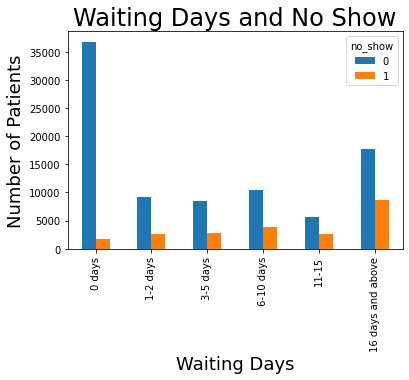

In [51]:
groups = df.groupby(['waiting','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Waiting Days and No Show', fontsize = 24)
plt.xlabel('Waiting Days', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

### Creating a new column that categorizes age and preparing data for it.

In [53]:
edges_bin = [0, 12, 19, 35, 60, 115]
names_bin = ['Child','Teen','Young Adult', 'Old Adult','Old']
age_category = pd.cut(df['age'], edges_bin, labels=names_bin)
df.insert(7, 'age_category', age_category)
df.head()

,patient_id,gender,scheduled_day,appointment_day,days_in_between,waiting,age,age_category,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,showed_up,no_showing
0,2.987250e+13,F,2016-04-29,2016-04-29,0,0 days,62.0,Old,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,M,2016-04-29,2016-04-29,0,0 days,56.0,Old Adult,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,F,2016-04-29,2016-04-29,0,0 days,62.0,Old,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,F,2016-04-29,2016-04-29,0,0 days,8.0,Child,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,F,2016-04-29,2016-04-29,0,0 days,56.0,Old Adult,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


### Patients who are categorized as old adults between 35 and 60 years of age have the higher tendency to not show up.

Text(0, 0.5, 'Number of Patients')

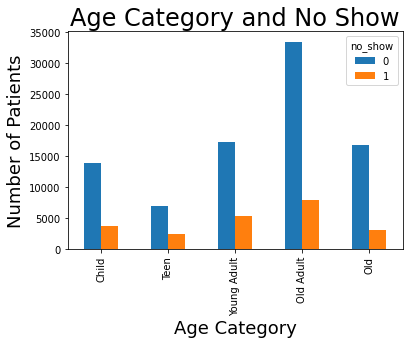

In [54]:
groups = df.groupby(['age_category','no_show']).size().unstack(fill_value=0)
groups.plot.bar();
plt.title('Age Category and No Show', fontsize = 24)
plt.xlabel('Age Category', fontsize=18)
plt.ylabel('Number of Patients', fontsize=18)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Findings:
### 1. People without scholarship have higher tendency to not show up.
### 2. People without hypertension have higher tendency to not show up.
### 3. People without diabetes have higher tendency to not show up.
### 4. People without alcoholism have higher tendency to not show up.
### 5. People without handicap have higher tendency to not show up.
### 6. The way the waiting days increase, people tendency to not show to the appointment increase.
### 7. Patients who are categorized as old adults between 35 and 60 years of age have the higher tendency to not show up.

### Limitations
### 1. Unique Patients are 62,299 out of 110,527
### 2. Appointment days are set between 29/04/2016 and 28/06/2016
### 3. Data is collected from 81 Neighbourhoods
### 4. Handicapped are limited to either the patient is handicapped or not regardless of the level.